# Dataset para a PI

## Imports necessários

In [19]:
import requests # Fazer uma solicitação HTTP
from bs4 import BeautifulSoup # Para a manipulação de HTML
import pandas as pd # Criação de dataframes
from io import StringIO # manipulaimport requests # Fazer uma solicitação HTTP
import matplotlib.pyplot as plt
import re
import seaborn as sns


## Funções usadas para tratamento da base


In [20]:
def categorize_incident(incident):
    if isinstance(incident, str):  # Verifica se é uma string antes de usar .lower()
        for category, keywords in categorias.items():
            for keyword in keywords:
                if keyword in incident.lower():
                    return category
    return 'Other'

def categorize_threat_level(category):
    for threat_level, categories in threat_levels.items():
        if category in categories:
            return threat_level
    return 'baixo'

def remove_text_and_commas(cell):
    if isinstance(cell, str):  # Certifica-se de que a célula é uma string
        # Remove tudo que não seja número
        clean_cell = re.sub(r'[^\d]', '', cell)
        return clean_cell if clean_cell else None  # Se a célula estiver vazia, retorna None
    return cell

## Webscraping da tabela da base do Wikipedia


In [21]:
# Configurações do Pandas para exibir todas as linhas e colunas sem truncamento
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# URL da página da Wikipedia que contém a lista de violação de dados
url = "https://en.wikipedia.org/wiki/List_of_data_breaches"
# Faz uma requisição GET para obter o conteúdo da página
resposta = requests.get(url)

# Verifica se a requisição foi bem-sucedida (código 200)
if resposta.status_code == 200:
    # Cria um objeto BeautifulSoup para analisar o HTML da página
    soup = BeautifulSoup(resposta.content, 'html.parser')
    # Encontra todas as tabelas com a classe 'wikitable sortable'
    tables = soup.find_all('table', {'class': 'wikitable sortable'})

    # Verifica se há pelo menos duas tabelas na página
    if len(tables) >= 2:
        # Lê a segunda tabela e a armazena em um DataFrame
        df = pd.read_html(StringIO(str(tables[1])))[0]

        # Dicionário para categorizar os incidentes de acordo com palavras-chave
        categorias = {
            'Incidentes relacionados a hacking': ['hacked', 'credential', 'trojan', 'ransomware'],
            'Exposição de dados/Má configuração': ['published', 'exposed', 'misconfigured', 'unsecured'],
            'Ameaças internas': ['inside job', 'insider', 'rogue', 'employee'],
            'Furto físico/Perda': ['lost', 'stolen', 'magnetic tape'],
            'Engenharia social': ['phishing', 'social engineering'],
            'Outro': []
        }

        # Dicionário para definir os níveis de ameaça baseados nas categorias
        threat_levels = {
            'alto': ['Incidentes relacionados a hacking', 'Engenharia social'],
            'medio': ['Exposição de dados/Má configuração', 'Furto físico/Perda'],
            'baixo': ['Ameaças internas'],
            'desconhecido': ['Outro']
        }

        # Aplica a função remove_text_and_commas à coluna 'Records' para limpar os dados
        df['Records'] = df['Records'].apply(remove_text_and_commas)

        # Substitui valores NaN por 'null' nas colunas específicas do DataFrame
        df['Entity'] = df['Entity'].fillna('null')
        df['Year'] = df['Year'].fillna('null')
        df['Records'] = df['Records'].fillna('null')
        df['Organization type'] = df['Organization type'].fillna('null')
        df['Method'] = df['Method'].fillna('null')

        # Aplica a categorização dos incidentes e determina o nível de ameaça
        df['categoria'] = df['Method'].apply(categorize_incident)
        df['nivel_ameaca'] = df['categoria'].apply(categorize_threat_level)

        # Remove a coluna 'Sources' do DataFrame
        df = df.drop('Sources', axis=1)

        # Renomeia colunas para tornar os nomes mais amigáveis
        df = df.rename(columns={'Entity': 'empresa',
                                 'Year': 'ano',
                                 'Records': 'numero_incidentes',
                                 'Organization type': 'ramo_empresa',
                                 'Method': 'tipo_incidente'})

        # Exibe o DataFrame final com os dados processados
        display(df)
    else:
        print("Não há tabelas suficientes.")
else:
    print("Erro ao acessar a página.")


,empresa,ano,numero_incidentes,ramo_empresa,tipo_incidente,categoria,nivel_ameaca
0,50 companies and government institutions,2022,6400000,various,poor security,Other,baixo
1,21st Century Oncology,2015,2200000,healthcare,hacked,Incidentes relacionados a hacking,alto
2,23andMe,2023,6900000,consumer genetics,credential stuffing,Incidentes relacionados a hacking,alto
3,500px,2020,14870304,social network,hacked,Incidentes relacionados a hacking,alto
4,Accendo Insurance Co.,2020,175350,healthcare,poor security,Other,baixo
5,Accenture,2007,null,null,null,Other,baixo
6,Adobe Systems Incorporated,2013,152000000,tech,hacked,Incidentes relacionados a hacking,alto
7,Adobe Inc.,2019,7500000,tech,poor security,Other,baixo
8,ADT Inc.,2024,30800,security,"""accessing certain databases containing custom...",Other,baixo
9,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,Furto físico/Perda,medio


## Criação dos gráficos (nome do dataframe: df)
exemplo: display(df)

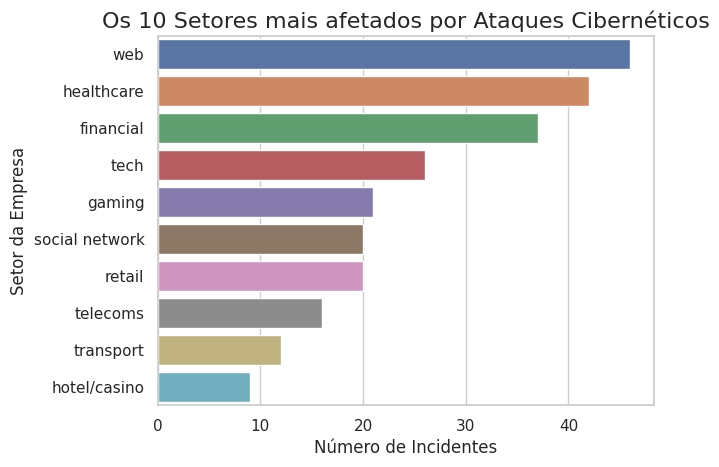

In [31]:
#OBS: Coloquei apenas os 10 setores, pois visualmente ficou bagunçado e dificil de entender com todos os setores.
# Impacto Social - Empresas Atacadas - 10 setores mais afetados
setor_counts = df['ramo_empresa'].value_counts().head(10)

# Gráfico de barras verticais
sns.barplot(x=setor_counts.values, y=setor_counts.index, hue=setor_counts.index, dodge=False, legend=False)

# Títulos e rótulos
plt.title('Os 10 Setores mais afetados por Ataques Cibernéticos', fontsize=16)
plt.xlabel('Número de Incidentes', fontsize=12)
plt.ylabel('Setor da Empresa', fontsize=12)

plt.show()

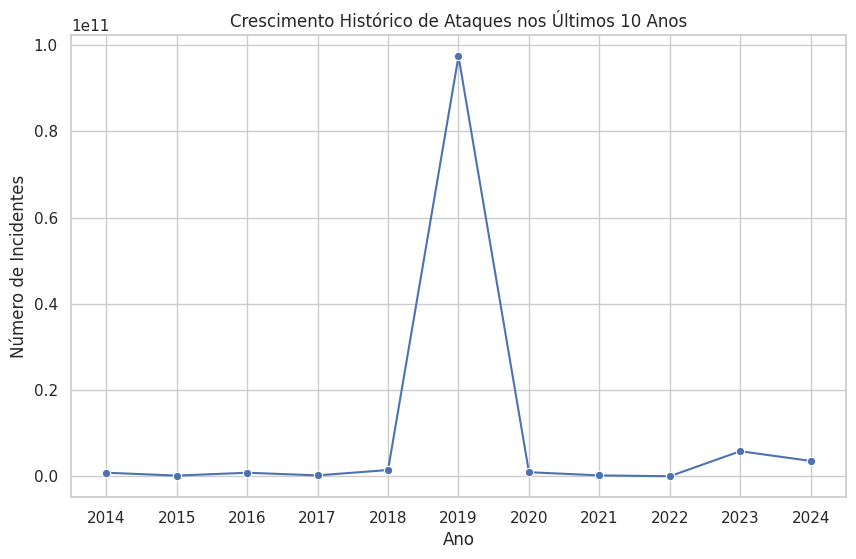

In [74]:
#OBS: Analisar melhor esse gráfico, pois não sei se esta de acordo com o que queremos. O ataque está muito elevado apenas em 2019.
# Projeção de Crescimento de Ataques nos últimos 10 anos
ano_atual = df['ano'].max()
df_ultimos_10_anos = df[df['ano'] >= (ano_atual - 10)]

# Agrupar os dados por ano e soma o número de incidentes
df_agrupado = df_ultimos_10_anos.groupby('ano')['numero_incidentes'].sum().reset_index()

# Gráfico de linha que mostrar o crescimento histórico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agrupado, x='ano', y='numero_incidentes', marker='o')

# Títulos
plt.title('Crescimento Histórico de Ataques nos Últimos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')

# Mostra no eixo x todos os anos (últimos 10 anos)
plt.xticks(df_agrupado['ano'])

plt.show()